In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.ignore = True

In [2]:
from sklearn.datasets import load_boston

In [3]:
l = load_boston()

In [ ]:
print(l.DESCR)

In [4]:
df = pd.DataFrame(l.data, columns=l.feature_names)

In [5]:
df['MEDV'] = l.target

In [ ]:
df.head(20)

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
round(df.describe(),2).T

In [ ]:
plt.plot(df['CRIM'])

In [ ]:
sns.countplot(df['CHAS'])

In [ ]:
df['CHAS'].value_counts()

In [ ]:
plt.scatter(df['RM'],df['MEDV'])
plt.xlabel('Rooms')
plt.ylabel('PRICE')

In [ ]:
plt.scatter(df['RAD'],df['MEDV'])
plt.xlabel('HIGHWAY')
plt.ylabel('PRICE')

In [ ]:
# Check the distribution of the target variable

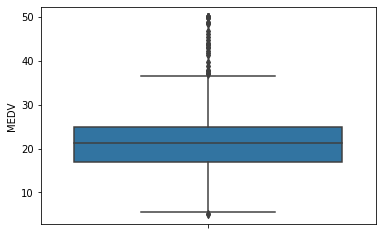

In [6]:
sns.boxplot(y=df['MEDV'])

In [ ]:
sns.distplot(df['MEDV'])

In [ ]:
# Assumption 1 --> Make sure all the x variables have a linear relationship with y variable

In [ ]:
round(df.corr(),2)

In [ ]:
plt.scatter(df['LSTAT'],df['MEDV'])

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)

In [ ]:
x = df.iloc[:,:13]

In [ ]:
y = df['MEDV']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state=2)

In [ ]:
x_train.shape

In [ ]:
y_test.shape

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
model = lr.fit(x_train,y_train)

In [ ]:
model

In [ ]:
model.coef_[8]

In [ ]:
x_train.columns

In [ ]:
model.coef_

In [ ]:
model.coef_[7]

In [ ]:
df.head()

In [ ]:
dir(model)

In [ ]:
model.fit_intercept

In [ ]:
model.intercept_

In [ ]:
p = model.intercept_+(model.coef_[0]*5.82115)+(model.coef_[1]*0.00000)+(model.coef_[2]*18.10000)+(model.coef_[3]*0.00000)+(model.coef_[4]*0.71300)+(model.coef_[5]*6.51300)+(model.coef_[6]*89.90000)+(model.coef_[7]*2.80160)+(model.coef_[8]*24.00000)+(model.coef_[9]*666.00000)+(model.coef_[10]*20.20000)+(model.coef_[11]*393.82000)+(model.coef_[12]*10.29000)

In [ ]:
pred_values = model.predict(x_test)

In [ ]:
x_test.iloc[0]

In [ ]:
y_test.iloc[0]

In [ ]:
pred_values

In [ ]:
from statsmodels import api as sm 

In [ ]:
model_stats = sm.OLS(y_train,x_train)

In [ ]:
model_stats= model_stats.fit()

In [ ]:
model_stats.summary()

In [ ]:
df.columns

In [ ]:
# Forward propagation --> Add one column at a time and check for the p value
# Back propagation --> Update the model with all the variables and remove the ones with larger p-value
# Step wise --> Akaike information criteria

In [ ]:
model_updated = sm.OLS(y_train,x_train.drop(['INDUS','NOX','AGE'], axis=1))

In [ ]:
model_updated=model_updated.fit()

In [ ]:
model_updated.summary()

In [ ]:
model_updated.fittedvalues[:5]

In [ ]:
y_train[:5]

In [ ]:
model_updated.resid[:5]

In [ ]:
np.sqrt(mean_squared_error(y_train,model_updated.predict(x_train.drop(['INDUS','NOX','AGE'], axis=1))))

In [ ]:
# Assumption 2 --> Avoid high multi collinearity
# VIF  --> Variance Inflation factor, if it is higher than 10 generally variable seems to be 
# highly correlated

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(x.corr(),annot=True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
[variance_inflation_factor(x.values,i) for i in range (len(x.columns))]

In [ ]:
x.columns

In [ ]:
# Assumption 3 --> Make sure the error of the model doesn't follow a pattern or it follows 
# normal distribution

In [ ]:
sns.distplot(model_updated.resid)

In [ ]:
sns.boxplot(y=model_updated.resid)

In [ ]:
pred_price = model_updated.predict(x_test.drop(['INDUS','NOX','AGE'], axis=1))

In [ ]:
pred_price[:5]

In [ ]:
y_test[:5]

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
rmse=np.sqrt(mean_squared_error(y_test,pred_price))

In [ ]:
rmse

In [ ]:
mean_absolute_error(y_test,pred_price)

In [ ]:
error_df = pd.DataFrame({'Actual':y_test,'Predicted':pred_price})

In [ ]:
error_df=error_df.reset_index(drop=True)

In [ ]:
plt.plot(error_df)

In [ ]:
sns.boxplot(y=y_test)

In [ ]:
sns.boxplot(y=df['MEDV'])

In [ ]:
# R squared (Coefficient of determination)
# Adjusted R squared --> Penalise r2 upon adding each variables

In [ ]:
# Handling outliers

# Remove outliers
# Change the values
# Add more information

In [ ]:
df_outliers_rmvd=df[df['MEDV']<35]

In [ ]:
sns.boxplot(y=df_outliers_rmvd['MEDV'])

In [ ]:
# Classification and Regression Trees

In [ ]:
# Decision Trees for regression

# Condition based model
# Root node, branches, terminal nodes
# Root node is formed based on the mean squared error
# Generalised model & hence unaffected by the outliers
# Suffers from overfitting if not taken care of the depth of the tree.
# Easy and comprehensive

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
d = DecisionTreeRegressor(max_depth=8)

In [ ]:
dtree_model = d.fit(x_train,y_train)

In [ ]:
#!pip install dtreeviz

In [ ]:
from dtreeviz.trees import dtreeviz

In [ ]:
tree_img = dtreeviz(dtree_model, x_train,y_train, target_name='MEDV', feature_names=x_train.columns)

In [ ]:
tree_img

In [ ]:
# Predict on the test dataset

In [ ]:
pred_price_tree = dtree_model.predict(x_test)

In [ ]:
np.sqrt(mean_squared_error(y_test,pred_price_tree))

In [ ]:
error_tree = pd.DataFrame({'Actual':y_test,'Predicted':pred_price_tree})

In [ ]:
error_tree = error_tree.reset_index(drop=True)

In [ ]:
error_tree

In [ ]:
plt.plot(error_tree)

In [ ]:
plt.plot(error_df)

In [ ]:
# Ensemble --> Bagging

In [ ]:
# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor()

In [ ]:
rf_model = rf_model.fit(x_train,y_train)

In [ ]:
pred_price_rf = rf_model.predict(x_test)

In [ ]:
np.sqrt(mean_squared_error(y_test,pred_price_rf))

In [ ]:
df2 = pd.read_csv("D://data/PS_20174392719_1491204439457_log.csv")

In [ ]:
df2.head()

In [ ]:
df2.shape

In [ ]:
df2['isFraud'].value_counts()

In [ ]:
df2['isFlaggedFraud'].value_counts()

In [ ]:
df_reg = pd.read_csv("D://data/Regression.csv")

In [ ]:
df_reg.head()

In [ ]:
df_reg.corr()

In [ ]:
df_reg.dropna(inplace=True)

In [ ]:
x= df_reg.iloc[:,:6]

In [ ]:
y = df_reg['Purchase made']

In [ ]:
df_reg.groupby('Job Type').agg({'Purchase made':[np.mean,'max','mean']})

In [ ]:
sns.boxplot(y=df_reg['Purchase made'], x=df_reg['Metro City'])

In [ ]:
df_reg.head()

In [ ]:
dummies=pd.get_dummies(df_reg[['Job Type','Marital Status', 'Education','Metro City']], drop_first=True)

In [ ]:
x1 = pd.concat([x.drop(['Job Type','Marital Status', 'Education','Metro City'],axis=1),dummies], axis=1)

In [ ]:
x1.dropna

In [ ]:
mod_dummies = lr.fit(x1.dropna(),y)